In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [1]:
#df = pd.DataFrame({'Object' : ['A', 'B', 'C', 'D'],
#                   'X1' : [-1, 0, 1, 2],
#                   'X2' : [-1, 0, 1, 2],
#                   'Y' : [1, 0 , 1, 4]})
#df

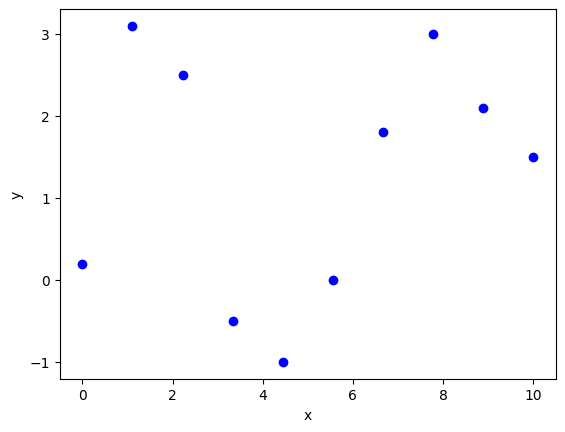

In [35]:
np.random.seed(42)
x = np.linspace(0, 10, 10)
y = [0.2, 3.1, 2.5, -0.5, -1, 0, 1.8, 3, 2.1, 1.5]

plt.scatter(x, y, color='blue')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [36]:
y

[0.2, 3.1, 2.5, -0.5, -1, 0, 1.8, 3, 2.1, 1.5]

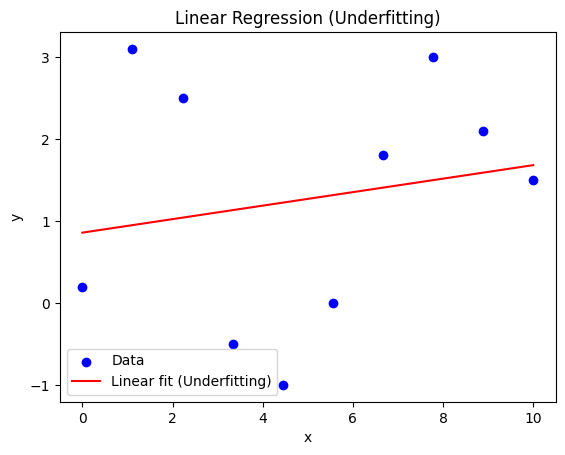

In [37]:
x_reshaped = x.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)
y_pred_linear = linear_model.predict(x_reshaped)

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred_linear, color='red', label='Linear fit (Underfitting)')
plt.title('Linear Regression (Underfitting)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

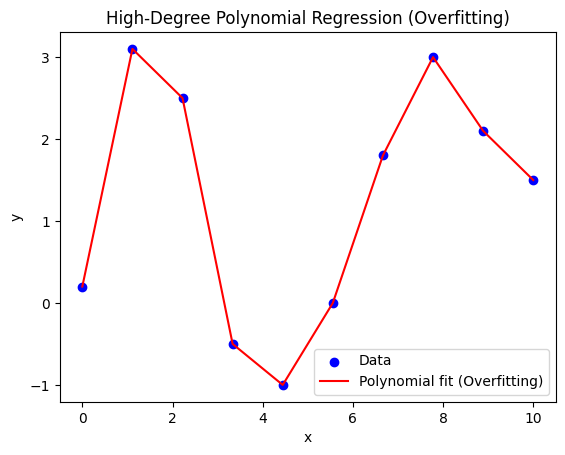

High-Degree Polynomial Regression Coefficients:
Coef: [ 0.00000000e+00 -1.09197574e+01  3.21613662e+01 -2.84749205e+01
  1.23219885e+01 -3.05363205e+00  4.56689085e-01 -4.07826032e-02
  2.00180291e-03 -4.15307414e-05]
Intercept: 0.19999986288486982


In [38]:

# degree 9
high_degree_poly = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
high_degree_poly.fit(x_reshaped, y)
y_pred_high_degree = high_degree_poly.predict(x_reshaped)

linear_reg = high_degree_poly.named_steps['linearregression']
high_degree_coef = linear_reg.coef_
high_degree_intercept = linear_reg.intercept_

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred_high_degree, color='red', label='Polynomial fit (Overfitting)')
plt.title('High-Degree Polynomial Regression (Overfitting)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("High-Degree Polynomial Regression Coefficients:")
print(f"Coef: {high_degree_coef}")
print(f"Intercept: {high_degree_intercept}")

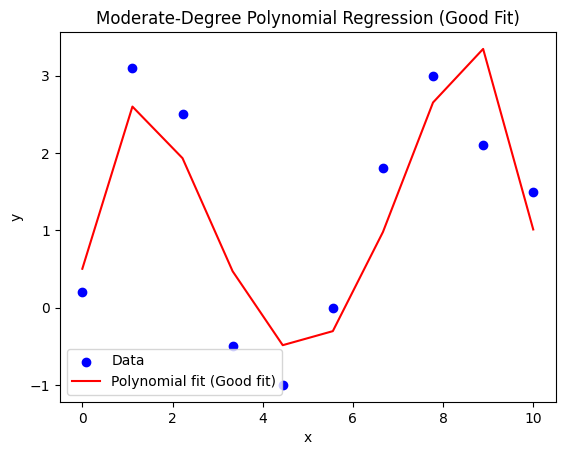

Moderate-Degree Polynomial Regression Coefficients:
Coef: [ 0.          3.87379371 -2.16620717  0.36134213 -0.0182951 ]
Intercept: 0.5020979020940399


In [39]:
# degree 4
moderate_degree_poly = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
moderate_degree_poly.fit(x_reshaped, y)
y_pred_moderate_degree = moderate_degree_poly.predict(x_reshaped)

linear_reg = moderate_degree_poly.named_steps['linearregression']
moderate_degree_coef = linear_reg.coef_
moderate_degree_intercept = linear_reg.intercept_

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred_moderate_degree, color='red', label='Polynomial fit (Good fit)')
plt.title('Moderate-Degree Polynomial Regression (Good Fit)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Moderate-Degree Polynomial Regression Coefficients:")
print(f"Coef: {moderate_degree_coef}")
print(f"Intercept: {moderate_degree_intercept}")

In [40]:
## Ridge and Lasso

In [41]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [43]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [44]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [45]:
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))

print("\nRidge Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

print("\nLasso Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

Linear Regression:
Mean Squared Error: 0.9177532469714291

Ridge Regression:
Mean Squared Error: 0.9127015125504231

Lasso Regression:
Mean Squared Error: 0.9155385904506887


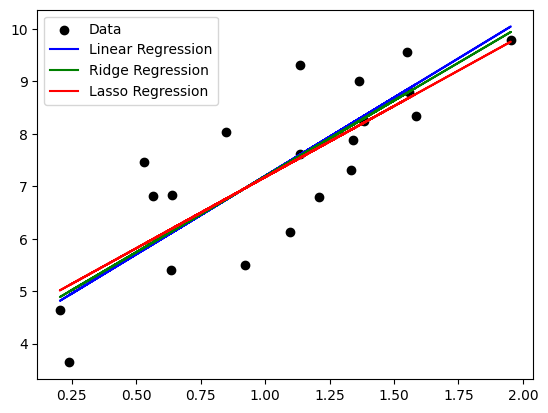

In [32]:
plt.scatter(X_test, y_test, color='black', label='Data')
plt.plot(X_test, y_pred_lin, color='blue', label='Linear Regression')
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot(X_test, y_pred_lasso, color='red', label='Lasso Regression')
plt.legend()
plt.show()